In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
#Training_data:

In [4]:
train_df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [5]:
train_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
train_df['meantemp_nextday'] = train_df['meantemp'].shift(-1)

In [7]:
train_df.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_nextday
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000


In [9]:
#Testing_data:

In [10]:
test_df = pd.read_csv("DailyDelhiClimateTest.csv")

In [11]:
test_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [12]:
test_df['meantemp_nextday'] = test_df['meantemp'].shift(-1)

In [13]:
test_df.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_nextday
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,18.500000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,17.111111
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,18.700000
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,18.388889
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,19.318182


In [14]:
x_train = train_df.drop(columns =["meantemp_nextday","date"])

In [23]:
x_train.head()

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000


In [29]:
y_train = train_df["meantemp_nextday"]

In [31]:
y_train.head()

0    7.400000
1    7.166667
2    8.666667
3    6.000000
4    7.000000
Name: meantemp_nextday, dtype: float64

In [33]:
y_train = y_train.fillna(y_train.mean())

In [35]:
x_test = test_df.drop(columns =["meantemp_nextday","date"])

In [37]:
y_test = test_df["meantemp_nextday"]

In [39]:
y_test = y_test.fillna(y_test.mean())

In [41]:
randomforest = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [43]:
randomforest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
randomforest.score(x_test, y_test)

0.9046499795232701

In [47]:
y_predicted = randomforest.predict(x_test)

In [49]:
mae = mean_absolute_error(y_test, y_predicted)

In [51]:
mse = mean_squared_error(y_test, y_predicted)

In [53]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1.4446935698869148
Mean Squared Error: 3.7947384080384685


In [55]:
import matplotlib.pyplot as plt

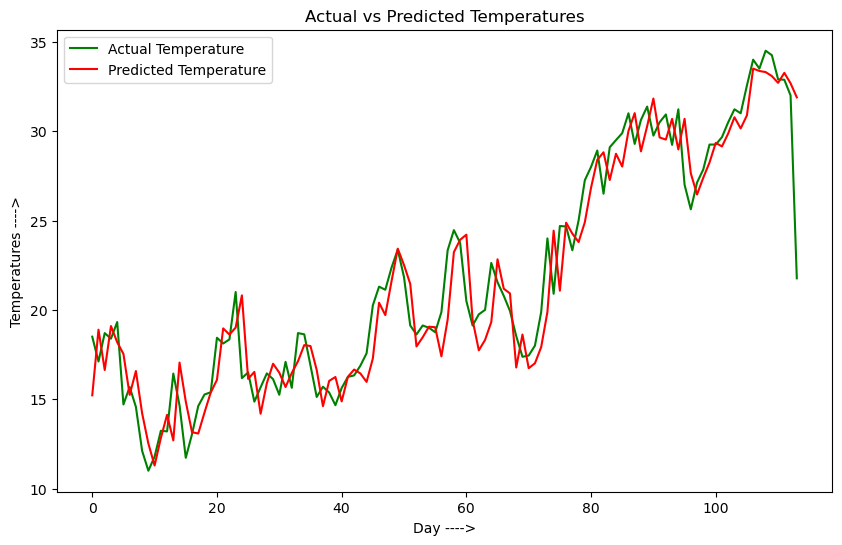

In [57]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label = "Actual Temperature", color="green")
plt.plot(y_predicted, label = "Predicted Temperature", color="red")
plt.legend()
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Day ---->")
plt.ylabel("Temperatures ---->")
plt.show()

In [59]:
import pickle

In [61]:
with open('weather_forecast_prediction_model.pkl', 'wb') as file:
    pickle.dump(randomforest, file)